# Optimizers

This notebooks shows how to implemetn various optimizers in Keras. 
It then benchmarks their effectiveness (best accuracy) on a toy dataset (Fashion-MNIST) and a toy model (dense 4-layered NN).
The results should not be generalized too boardly to other datasets and models. However, experience has shown that for many cases, Adam (or one of its variants) is a good choice, as suggested by this example.

The takeaways from this notebook are to know how to:
1. Use the various Keras optimizers
2. Run your own benchmark over optimizers and hyperparameters, by using validation metrics as done here


This notebook is based on the [notebook](https://github.com/ageron/handson-ml3/blob/main/11_training_deep_neural_networks.ipynb) associated with Geron chapter 11. It is presented here with modifications in accordance with the Apache 2.0 license.

In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Get the Data

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

## Preprocess the Data

In [4]:
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [5]:
def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_valid, y_valid), 
                     verbose=0)  # don't print progress

## SGD

In [6]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

history_sgd = build_and_train_model(optimizer)

## SGD with Momentum

In [7]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

history_momentum = build_and_train_model(optimizer)

## Nesterov Accelerated Gradient

In [8]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,
                                    nesterov=True)

history_nesterov = build_and_train_model(optimizer)

## AdaGrad

In [9]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)

history_adagrad = build_and_train_model(optimizer)

## RMSProp

In [10]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

history_rmsprop = build_and_train_model(optimizer)

## Adam Optimization

**Adam**

In [11]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999)

history_adam = build_and_train_model(optimizer)

**Adamax Optimization**

In [12]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9,
                                       beta_2=0.999)

history_adamax = build_and_train_model(optimizer)

**Nadam Optimization**

In [13]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9,
                                      beta_2=0.999)

history_nadam = build_and_train_model(optimizer)

## visualize the learning curves of all the optimizers

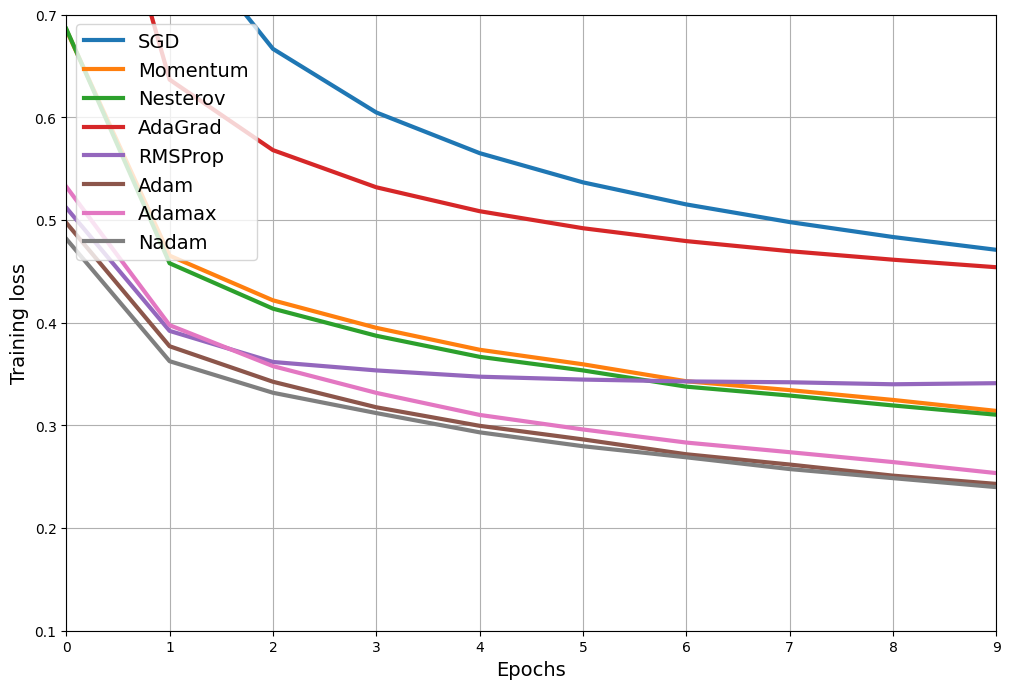

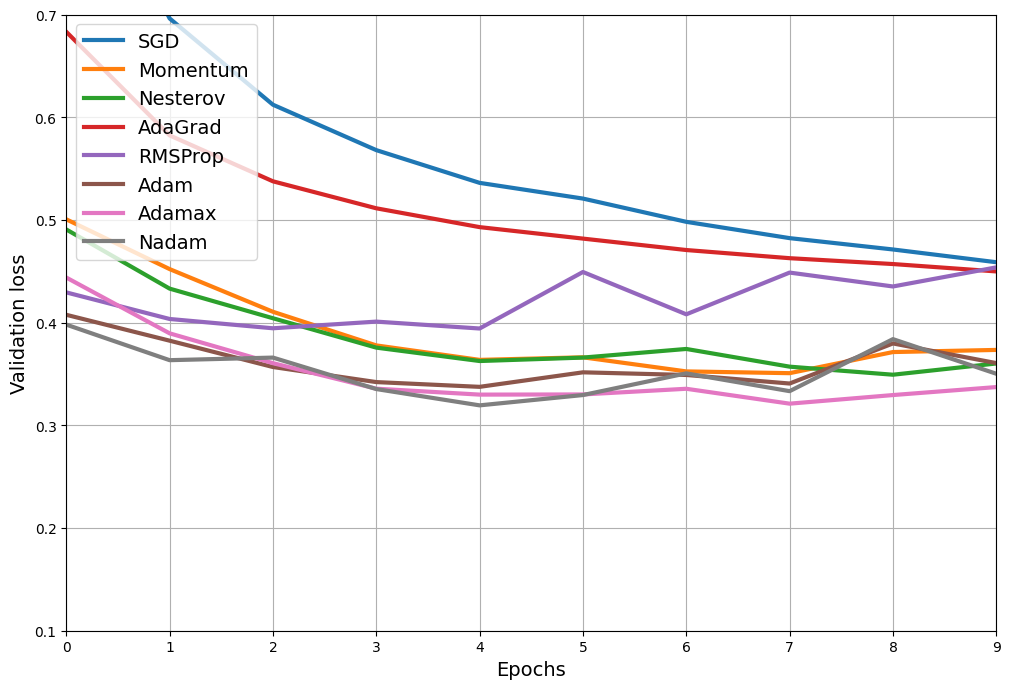

In [14]:
for loss in ("loss", "val_loss"):
    plt.figure(figsize=(12, 8))
    opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam AdamW"
    for history, opt_name in zip((history_sgd, history_momentum, history_nesterov,
                                  history_adagrad, history_rmsprop, history_adam,
                                  history_adamax, history_nadam,),
                                 opt_names.split()):
        plt.plot(history.history[loss], label=f"{opt_name}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"loss": "Training loss", "val_loss": "Validation loss"}[loss])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.1, 0.7])
    plt.show()